<a href="https://colab.research.google.com/github/luan-prates/bootcamp-ds-aplicada-alura-2021/blob/main/Projeto_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Bootcamp de Data Science Alura
## Projeto do módulo 1 

---

### by: Luan Rocha Prates

# Carregando e investigando os Dados 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
pd.D

In [63]:
plt.style.use("seaborn-darkgrid")

In [2]:
df_casos = pd.read_csv('/content/drive/My Drive/_datasets/integrasus.csv', sep=';', encoding='utf-8' , thousands='.', decimal=',',engine='python',error_bad_lines=False)

In [3]:
#df_casos.head()
#df_casos.tail()
#df_casos.describe()
#df_casos.shape
#df_casos.columns
#df_casos.dtypes

In [4]:
datas = ['data_nascimento','data_notificacao','data_inicio_sintomas','data_solicitacao_exame', 'data_coleta_exame','data_resultado_exame',
         'data_internacao_sivep','data_evolucao_caso_sivep','data_entrada_uti_sivep','data_saida_uti_sivep','data_obito']


In [5]:
for data in datas:
  df_casos[data] = df_casos[data].astype('datetime64', errors = 'ignore')

In [6]:
categorias = ['id_redcap','classificacao_estado_redcap', 'id_esus', 'classificacao_estado_esus', 'classificacao_final_esus',
              'evolucao_caso_esus', 'cbo_esus', 'profissional_saude_esus','pais_paciente','estado_paciente', 
              'municipio_paciente', 'bairro_paciente_geocoder','sexo_paciente','faixa_etaria',
              'resultado_final_exame', 'laboratorio_exame', 'tipo_teste_exame', 'requisicao_gal', 
              'obito_confirmado','local_obito', 'tipo_local_obito', 'id_sivep','classificacao_estado_sivep', 'evolucao_caso_sivep', 
              'comorbidade_puerpera_sivep', 'comorbidade_cardiovascular_sivep', 'comorbidade_hematologia_sivep','comorbidade_sindrome_down_sivep', 
              'comorbidade_hepatica_sivep', 'comorbidade_asma_sivep', 'comorbidade_diabetes_sivep','comorbidade_neurologia_sivep', 
              'comorbidade_pneumopatia_sivep', 'comorbidade_imunodeficiencia_sivep', 'comorbidade_renal_sivep','comorbidade_obesidade_sivep', 
              'comorbidade_hiv','comorbidade_neoplasias']

In [7]:
for categoria in categorias:
  df_casos[categoria] = df_casos[categoria].astype('category', errors = 'ignore')

### slice and dice

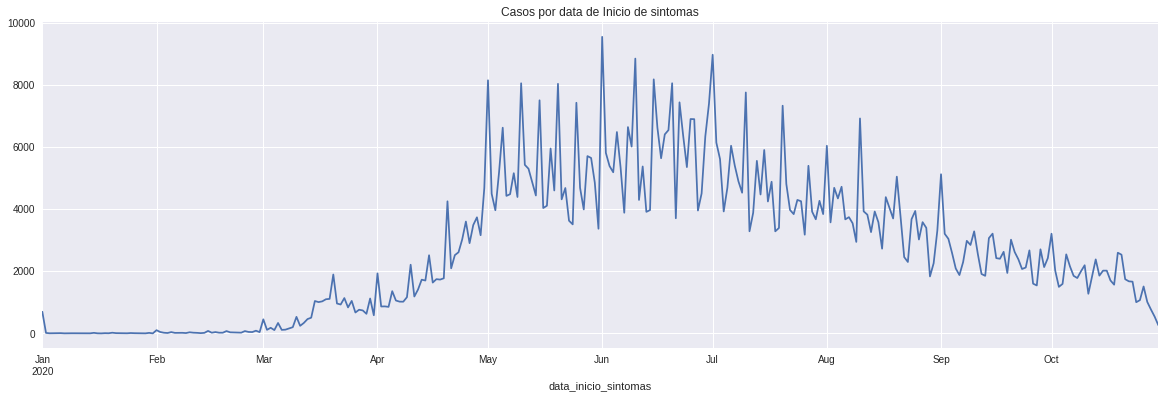

In [64]:
ts = df_casos.groupby(['data_inicio_sintomas']).data_inicio_sintomas.count()
ts.plot(figsize=(20,6), title='Casos por data de Inicio de sintomas')

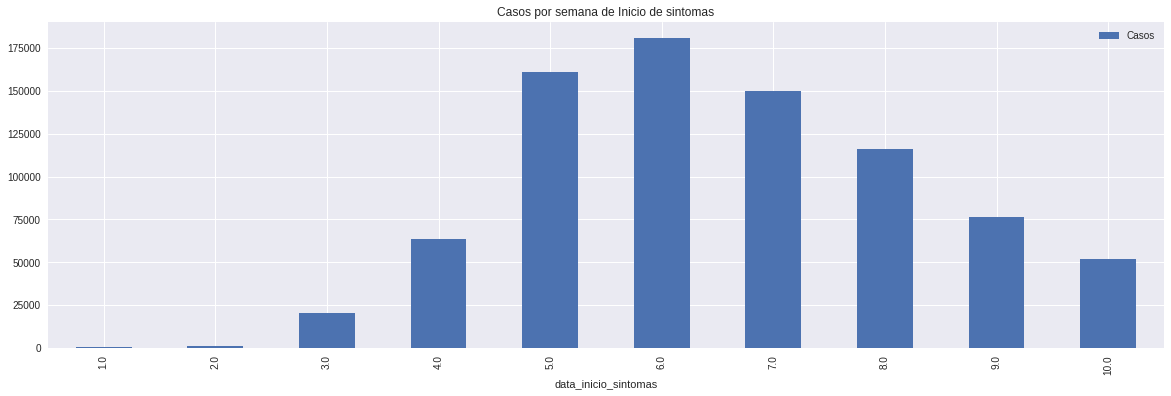

In [70]:
df_por_semana = df_casos.groupby(df_casos['data_inicio_sintomas'].dt.month).size().reset_index().rename(columns={0: 'Casos'}).set_index('data_inicio_sintomas')
df_por_semana.plot(kind='bar', figsize=(20, 6), title='Casos por semana de Inicio de sintomas')

## Casos por Resultado de exame

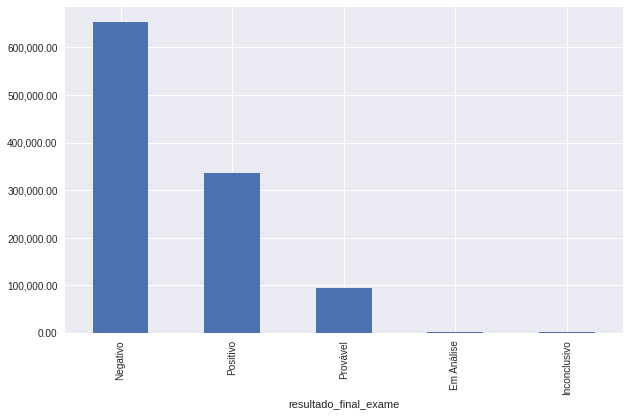

In [66]:
df_casos_por_resultado = df_casos.groupby(['resultado_final_exame']).resultado_final_exame.count()
df_casos_por_resultado_ordenado = df_casos_por_resultado.sort_values(ascending=False)
ax = df_casos_por_resultado_ordenado.plot(kind='bar', figsize=(10, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

## Curva Epidemilógica 

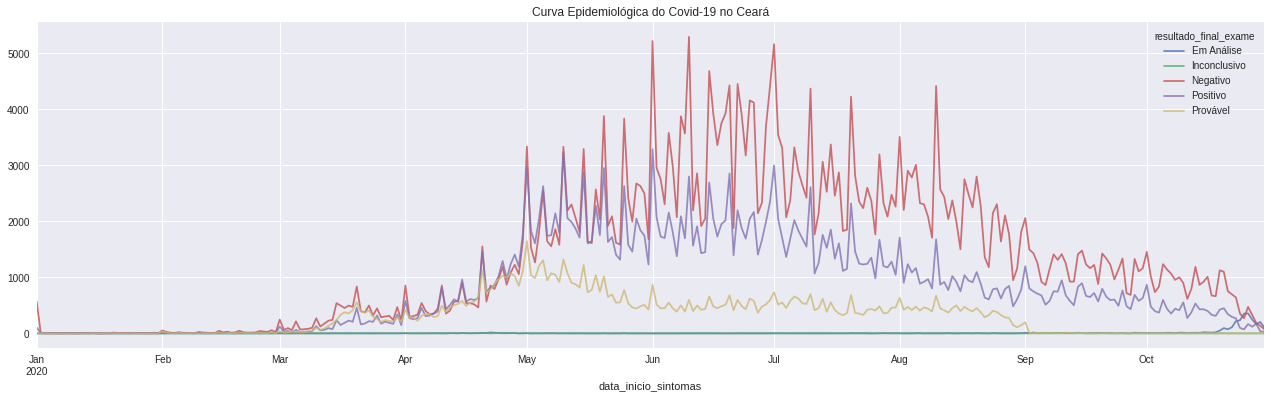

In [67]:
df_casos_por_dia_e_resultado = df_casos.groupby(['data_inicio_sintomas','resultado_final_exame'])[['id']].count().rename(columns={'id': 'Casos'})
df_casos_por_dia_e_resultado = df_casos_por_dia_e_resultado.reset_index()
df_casos_por_dia_e_resultado['Casos'] = df_casos_por_dia_e_resultado['Casos'].fillna(0)
df_casos_por_dia_e_resultado_pivot = df_casos_por_dia_e_resultado.pivot(index="data_inicio_sintomas", columns='resultado_final_exame',values="Casos")
ax = df_casos_por_dia_e_resultado_pivot.plot(alpha=0.8,figsize=(22,6), title='Curva Epidemiológica do Covid-19 no Ceará')


## Apenas os casos positivos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


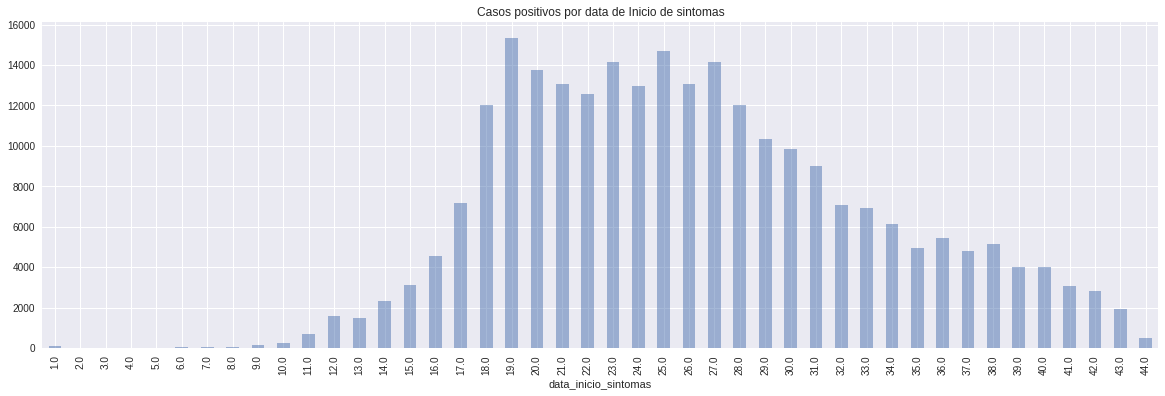

In [68]:
df_casos_positovos = df_casos[(df_casos["resultado_final_exame"] == 'Positivo')]
df_casos_positovos

ts_positovos = df_casos_positovos.groupby(df_casos_positovos['data_inicio_sintomas'].dt.week).data_inicio_sintomas.count()
ts_positovos.plot(kind='bar',alpha=0.5,figsize=(20,6), title='Casos positivos por data de Inicio de sintomas')

In [72]:
df_casos_positovos_por_municipio = df_casos_positovos.groupby('municipio_paciente').municipio_paciente.count()

In [76]:
df_casos_positovos_por_municipio.sort_values(ascending=False).head()

municipio_paciente
FORTALEZA            73299
JUAZEIRO DO NORTE    17239
SOBRAL               13694
CRATO                 9420
MARACANAU             9339
Name: municipio_paciente, dtype: int64

In [83]:
!pip3 install Pyglet
!pip3 install geoplotlib

In [86]:
import geoplotlib

NoSuchDisplayException: ignored

In [69]:
#from pandas.plotting import andrews_curves
#andrews_curves(df_casos_por_dia_e_resultado_pivot, 'Positivo')
